### Building a Multiple linear Regression Model to predict the demand of Shared bike with in a region 
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To address these challenges and prepare for a post-lockdown recovery, the company aims to create a strategic business plan to accelerate revenue growth as the economy improves. They are particularly interested in understanding the factors influencing the demand for shared bikes in the American market after quarantine restrictions end.

 - BoomBikes has hired a consulting firm to analyze a dataset that includes daily bike demand data, considering various factors such as weather conditions and user behavior. The company seeks to identify which variables significantly impact bike demand and how well these factors explain the fluctuations in usage. The insights gained from this analysis will help BoomBikes better cater to customer needs, differentiate itself from competitors, and achieve profitability.

### ___Step 1 : Importing the required Library___


In [3]:
# For Data managment and Adjustment
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data and Time 
from datetime import datetime as dt 

# To Prevent copy error for being seen 
import warnings
warnings.filterwarnings('ignore')

# For building a Model and Predictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### ___Step 2 : Reading Data___

In [5]:
bikes = pd.read_csv('day.csv', low_memory = True, )

In [6]:
bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [7]:
bikes[['temp','atemp','hum','windspeed']] = bikes[['temp','atemp','hum','windspeed']].round(2)

In [8]:
bikes.shape

(730, 16)

In [9]:
bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349


In [10]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319329,23.726384,62.765082,12.763699,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506827,8.150247,14.237634,5.195640,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.810000,16.892500,52.000000,9.040000,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465000,24.370000,62.625000,12.130000,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.882500,30.445000,72.990000,15.627500,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000


In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# Unique values present in the DataFrame
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          489
atemp         521
hum           589
windspeed     426
casual        605
registered    678
cnt           695
dtype: int64

In [13]:
# Having a list of column names present in the dataframe for easy access later on.
df_columns = bikes.columns.tolist()
print(df_columns)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


#### ___Step 2.1 : Segmenting the data for easy Handeling___

___Removing Date Time Variables and instant variable___

In [16]:
df = bikes.copy()

In [17]:
# Remove unnecessary instant column
df = df.drop(['instant', 'dteday'], axis=1)

In [18]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349


___Categorical Variables___

In [20]:
# Converting the object category into a categorical dtype.
cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']
df[cat_columns] = df[cat_columns].astype('category')
df[cat_columns].nunique()

mnth          12
season         4
yr             2
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

- The columns (yr, holiday, workingday) present in the Dataframe which has only two variable 0 or 1 represneting Yes or No will not be considered for Dummy variable. 

___Numerical Variables___

In [23]:
# Writing a function to Converting the object category into a numerical dtype.
def get_numeric_columns(df):
    """
    Returns a list of column names with float64 or int64 data types from the given DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    list: A list of column names with numeric data types.
    """
    return df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [24]:
num_columns = get_numeric_columns(df)
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

### ___Step 3: Vizualizing the Data___

- Visualization of numerical values using a scatter plot to identify a linear pattern.

In [27]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349


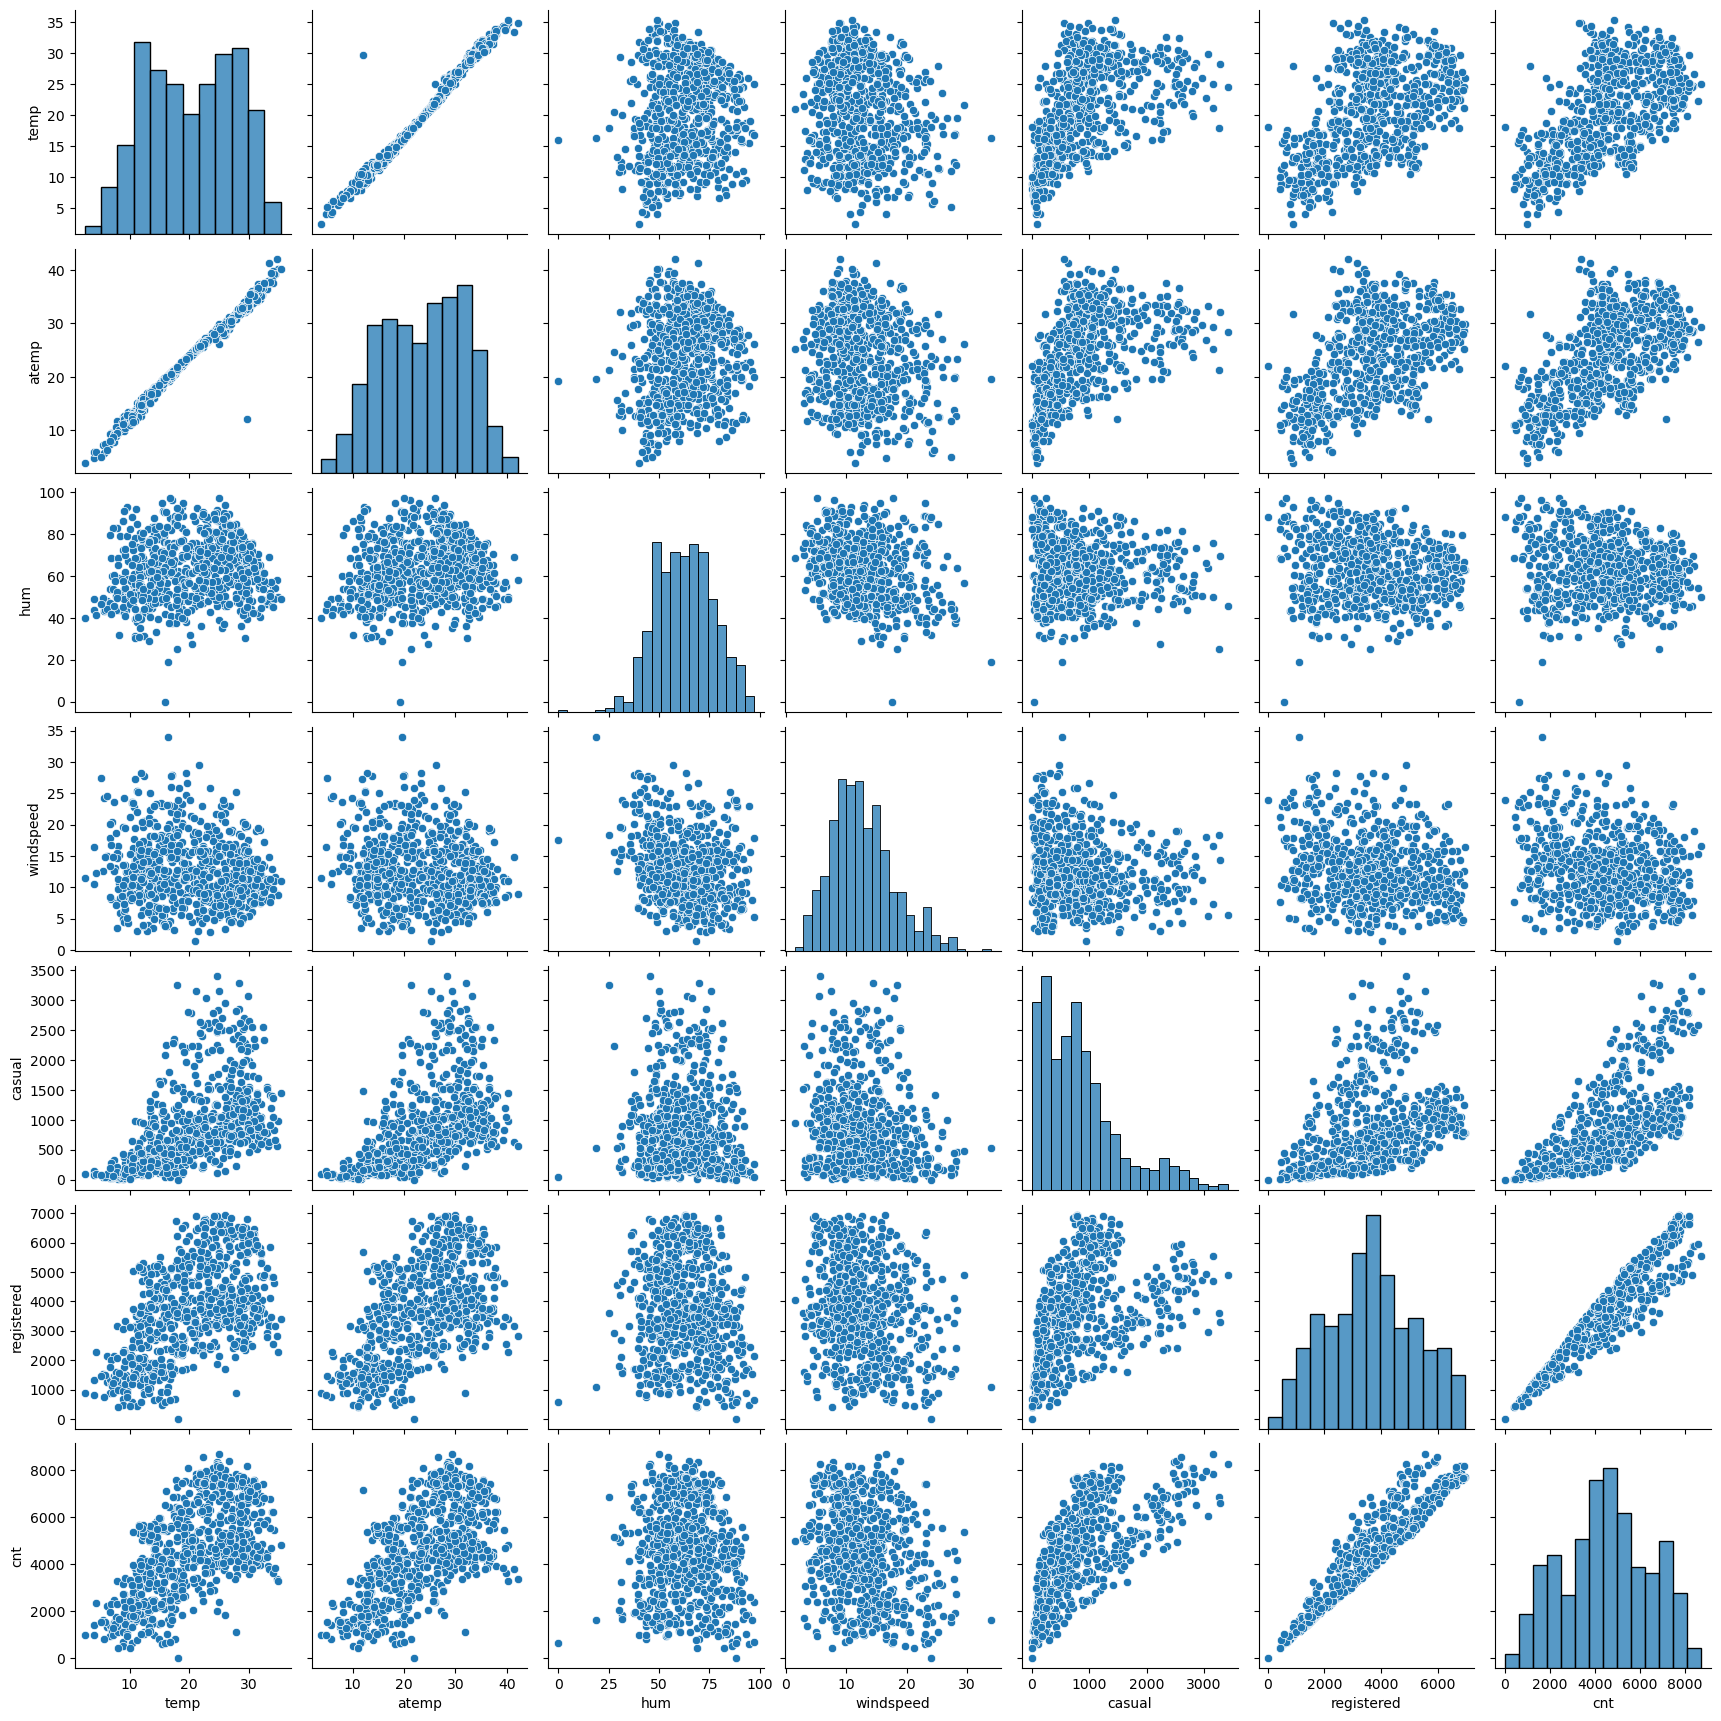

In [28]:
sns.pairplot(df)
plt.show()

    - Both humidity and wind speed do not exhibit a strong linear relationship. 
    - Although we can fit a line, the predictive power may not be very strong.
    - Temp and atemp are the same 

- For Categorical Variables Boxplot

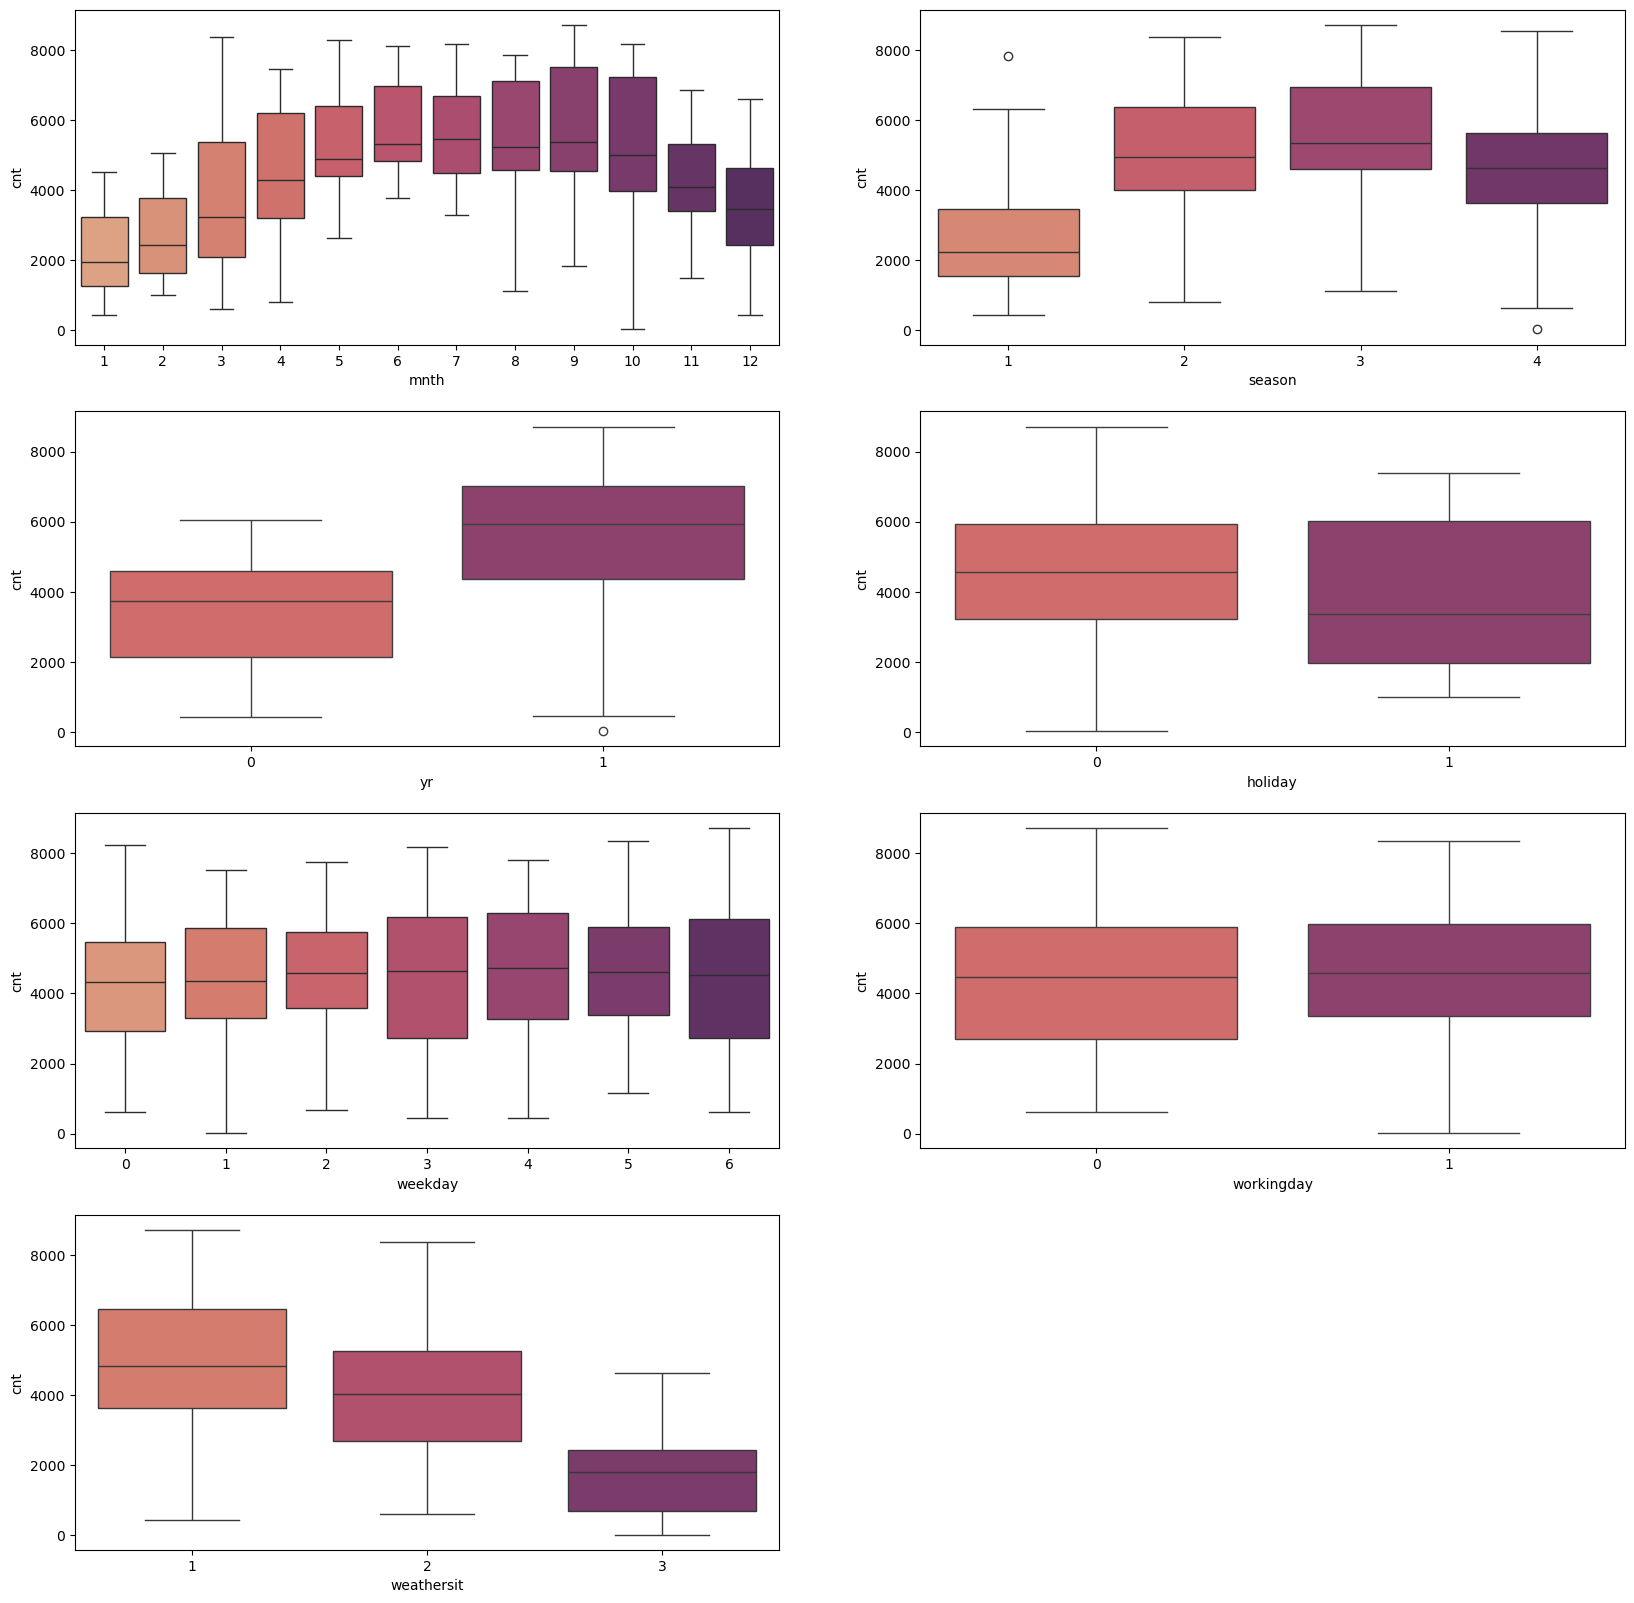

In [31]:
#cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']

# Boxplots for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=bikes, x= col, y='cnt', palette = 'flare')
plt.show()

- Weekday:
    - There seems to be some variation in the median count across different weekdays, but it's less pronounced.
    - Weekday could still be included in the model, but it may have a weaker predictive power compared to other features.

- For the regression model:
    - Categorical variables like season, weathersit, month, weekday, etc., should be one-hot encoded or treated as categorical variables.
    - Interaction terms (such as season:workingday) might also be worth exploring.

In [33]:
df = df.drop(['holiday', 'weekday','workingday'], axis=1)

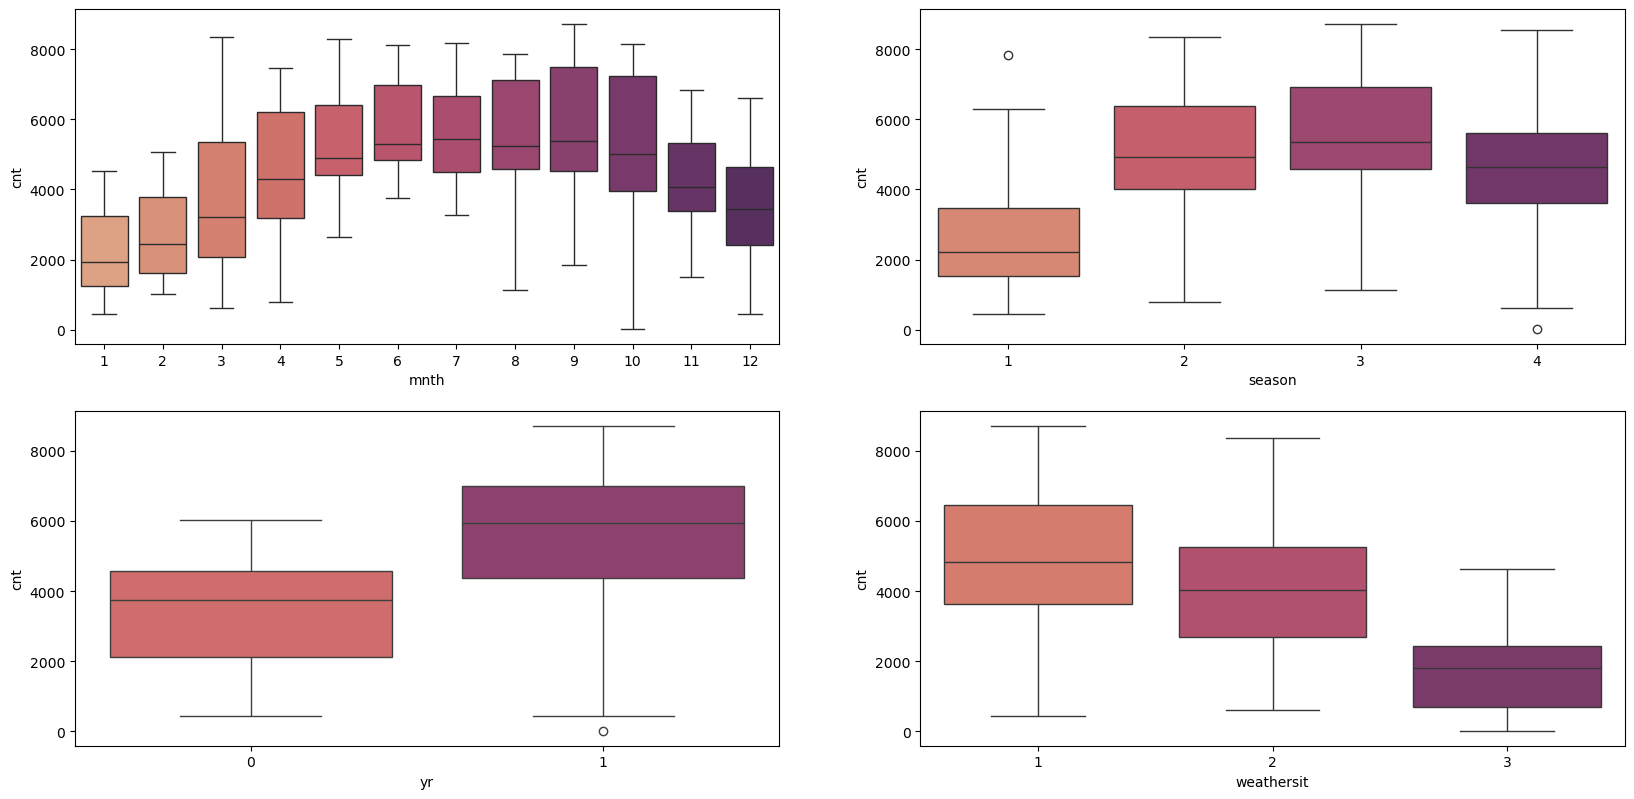

In [34]:
cat_columns = ['mnth','season', 'yr', 'weathersit']

# Boxplots for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=bikes, x= col, y='cnt', palette = 'flare')
plt.show()

#### ___Step 4.4 : Visualizing the correlation using a heat map.___

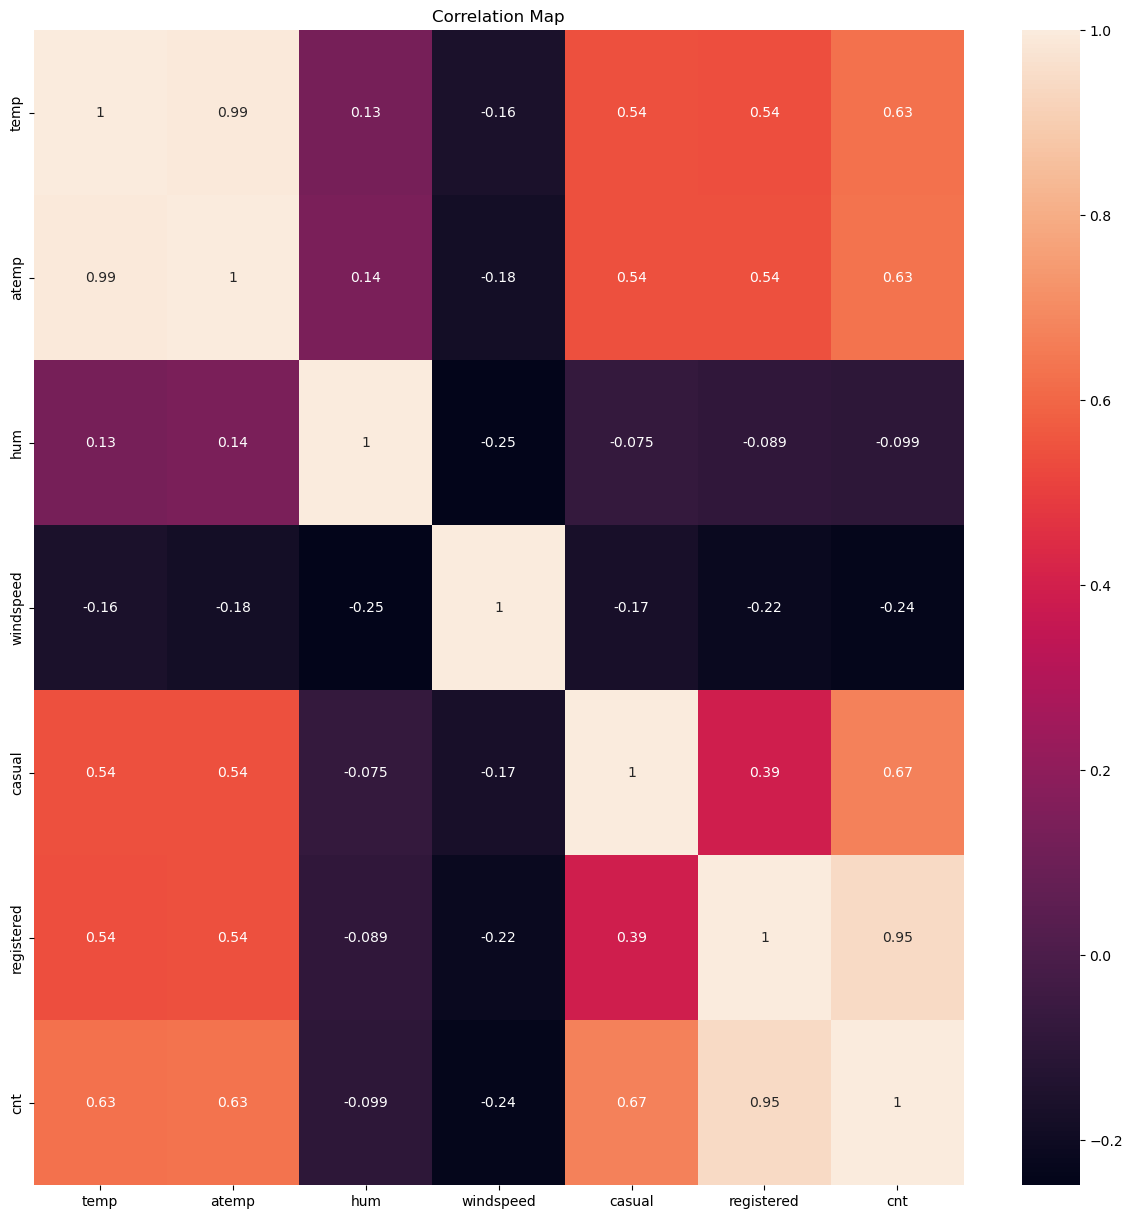

In [36]:
plt.figure(figsize = (15,15))

# Compute the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cbar = True)
plt.title("Correlation Map")
plt.show()

#### ___Correlation matrix___

- We will take a different approach from using the correlation matrix. Instead, we will unstack the upper triangle and identify the top 10 factors with the highest positive correlation with "cnt" as well as the top 20 factors with the strongest negative correlation with "cnt."

In [39]:
# Get the upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the upper triangle to get pairs and sort them
top_20_positive_correlations = (upper_triangle.unstack().sort_values(ascending=False).head(20))

top_20_positive_correlations

atemp       temp          0.991694
cnt         registered    0.945411
            casual        0.672123
            atemp         0.630694
            temp          0.627046
registered  atemp         0.543683
casual      atemp         0.543374
            temp          0.542723
registered  temp          0.539443
            casual        0.394137
hum         atemp         0.141526
            temp          0.128554
casual      hum          -0.075205
registered  hum          -0.089208
cnt         hum          -0.098538
windspeed   temp         -0.158173
casual      windspeed    -0.168011
windspeed   atemp        -0.183895
registered  windspeed    -0.217932
cnt         windspeed    -0.235152
dtype: float64

In [40]:
df = df.drop(['casual', 'registered'], axis=1)

In [41]:
def plot_correlation_heatmap(df, top_n=20):
    """
    Plots a correlation heatmap and returns the top N most positively correlated feature pairs.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    top_n (int): The number of top correlated feature pairs to return.

    Returns:
    pd.Series: A series containing the top N positively correlated feature pairs.
    """

    # Plot the correlation heatmap
    plt.figure(figsize=(15, 15))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cbar=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Map")
    plt.show()

    # Get the upper triangle of the correlation matrix to avoid duplicate pairs
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Unstack the upper triangle to get pairs and sort them by highest correlation
    top_positive_correlations = upper_triangle.unstack().sort_values(ascending=False).head(top_n)

    return top_positive_correlations

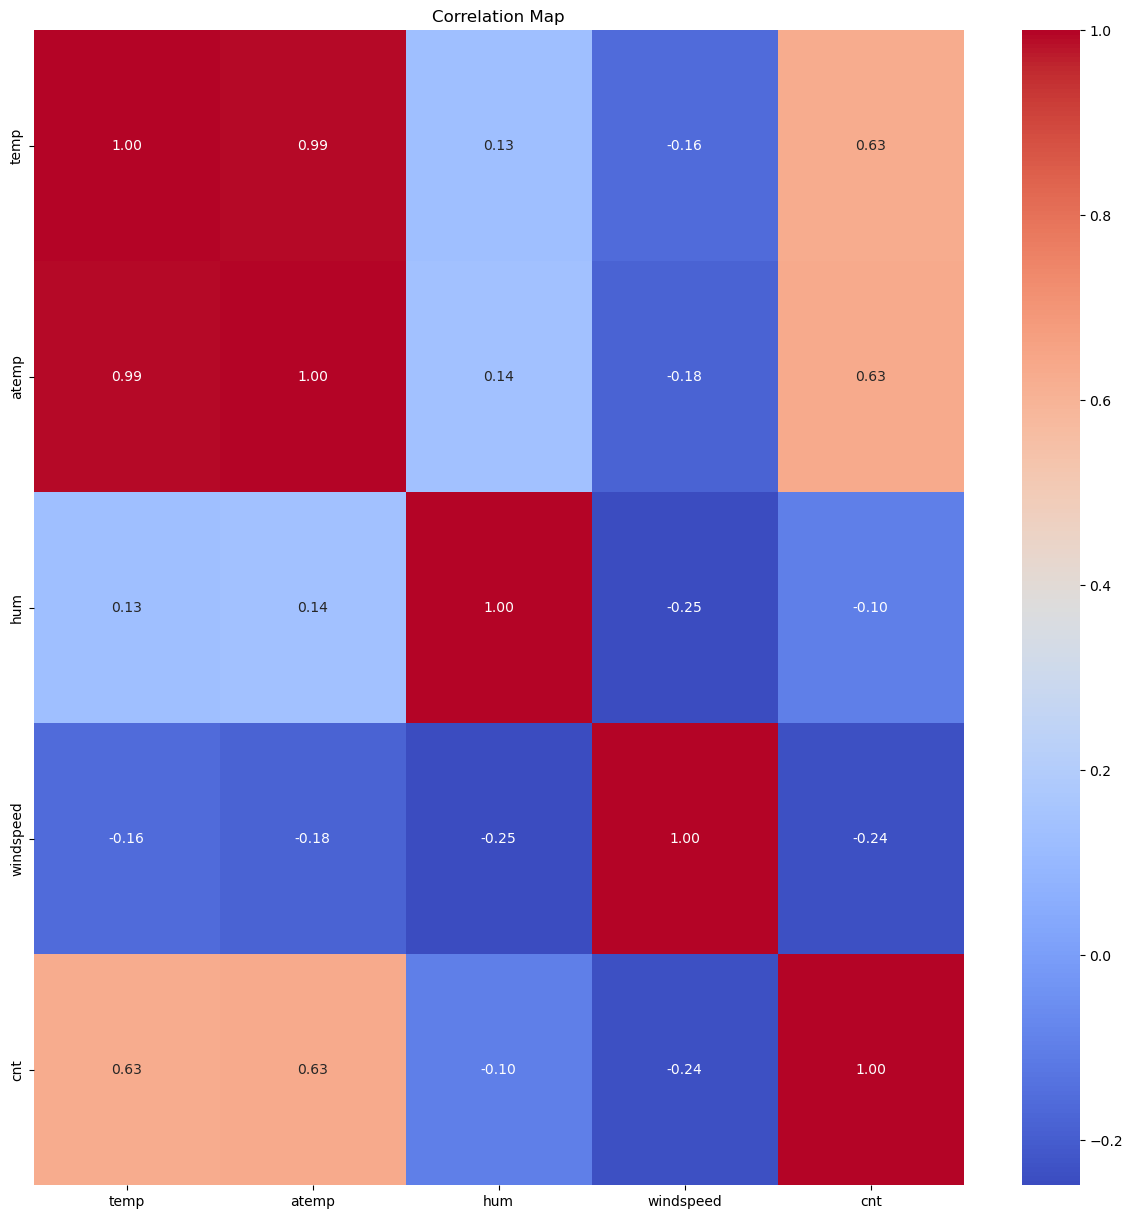

atemp      temp         0.991694
cnt        atemp        0.630694
           temp         0.627046
hum        atemp        0.141526
           temp         0.128554
cnt        hum         -0.098538
windspeed  temp        -0.158173
           atemp       -0.183895
cnt        windspeed   -0.235152
windspeed  hum         -0.248535
temp       temp              NaN
           atemp             NaN
           hum               NaN
           windspeed         NaN
           cnt               NaN
atemp      atemp             NaN
           hum               NaN
           windspeed         NaN
           cnt               NaN
hum        hum               NaN
dtype: float64


In [42]:
top_correlations = plot_correlation_heatmap(df, top_n=20)
print(top_correlations)

In [43]:
df = df.drop(['atemp'], axis=1)  # Or drop 'temp' instead

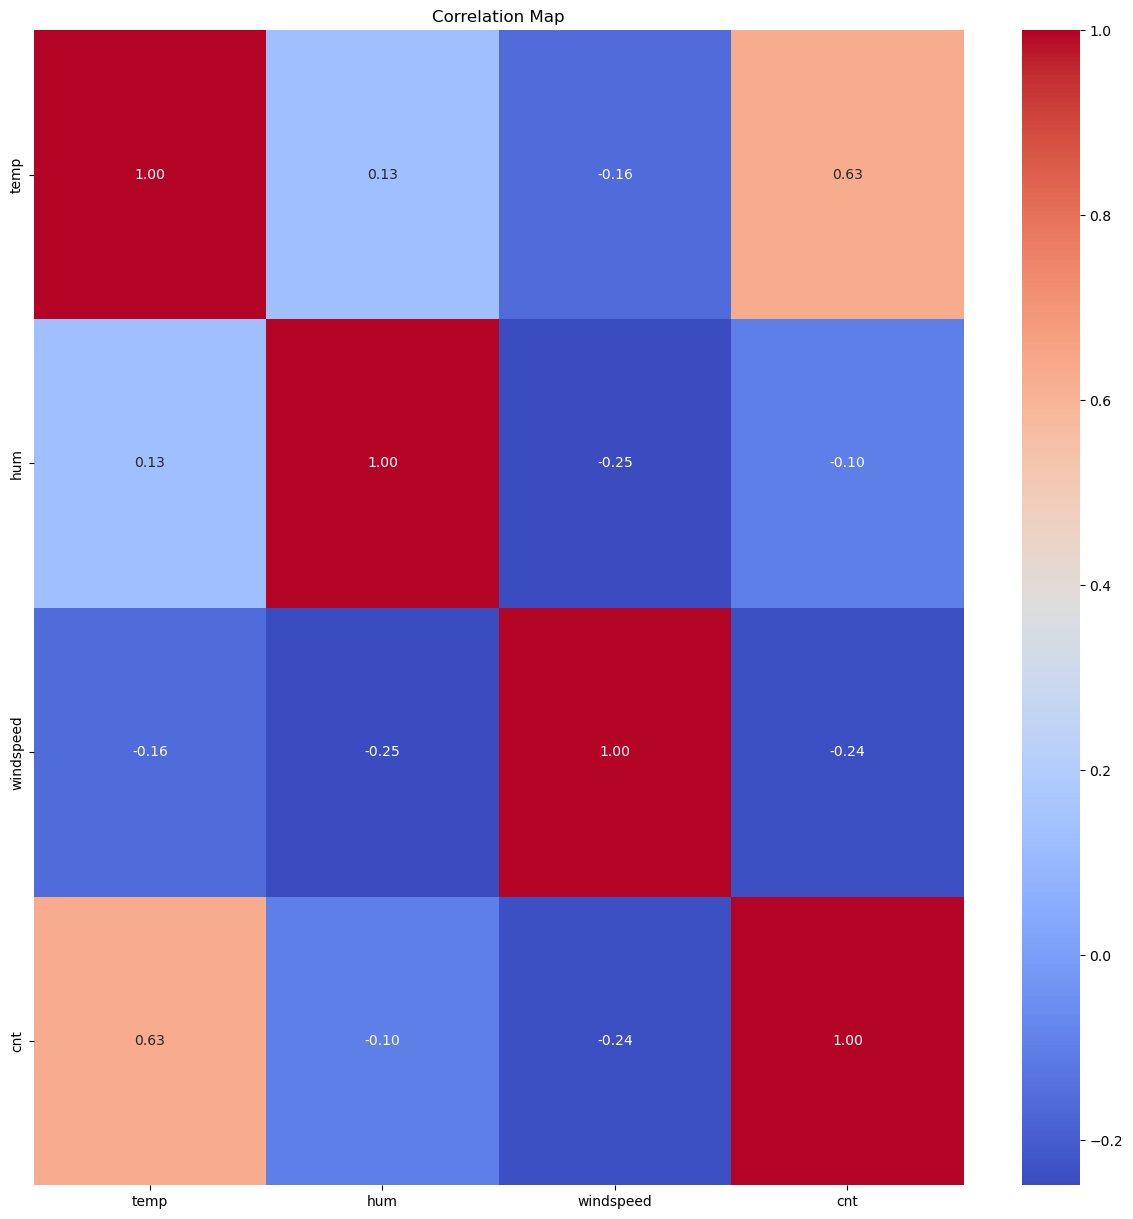

cnt        temp         0.627046
hum        temp         0.128554
cnt        hum         -0.098538
windspeed  temp        -0.158173
cnt        windspeed   -0.235152
windspeed  hum         -0.248535
temp       temp              NaN
           hum               NaN
           windspeed         NaN
           cnt               NaN
hum        hum               NaN
           windspeed         NaN
           cnt               NaN
windspeed  windspeed         NaN
           cnt               NaN
cnt        cnt               NaN
dtype: float64


In [44]:
top_correlations = plot_correlation_heatmap(df, top_n=20)
print(top_correlations)

In [45]:
#Since cnt is skewed, applying log1p (log(1 + x)) will normalize the distribution
df['cnt'] = np.log1p(df['cnt'])

In [46]:
df['temp_hum'] = df['temp'] * df['hum']
df['temp_wind'] = df['temp'] * df['windspeed']
df['hum_wind'] = df['hum'] * df['windspeed']

df = df.drop(['temp', 'hum', 'windspeed'], axis=1)  # Or drop 'temp' instead

### ___Step 4 : Preparing the data for modeling___

In [48]:
df.head(3)

,season,yr,mnth,weathersit,cnt,temp_hum,temp_wind,hum_wind
0,1,0,1,2,6.893656,1136.9838,151.6825,866.2350
1,1,0,1,2,6.687109,1037.1890,248.0850,1159.0065
2,1,0,1,1,7.207860,352.0265,133.9520,727.6672


#### ___Step 4.1 : Getting Dummy Variables for the Categorical Variables___

In [50]:
df_dummies = pd.get_dummies(df[['mnth','season', 'weathersit']], drop_first=True).astype('int')
df_dummies.nunique()

mnth_2          2
mnth_3          2
mnth_4          2
mnth_5          2
mnth_6          2
mnth_7          2
mnth_8          2
mnth_9          2
mnth_10         2
mnth_11         2
mnth_12         2
season_2        2
season_3        2
season_4        2
weathersit_2    2
weathersit_3    2
dtype: int64

In [51]:
dummy_cols = df_dummies.columns.tolist()
print(dummy_cols)

['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']


In [52]:
df.head()

,season,yr,mnth,weathersit,cnt,temp_hum,temp_wind,hum_wind
0,1,0,1,2,6.893656,1136.9838,151.6825,866.2350
1,1,0,1,2,6.687109,1037.1890,248.0850,1159.0065
2,1,0,1,1,7.207860,352.0265,133.9520,727.6672
3,1,0,1,1,7.354362,484.1280,88.0680,634.0896
4,1,0,1,1,7.378384,406.8470,116.5612,547.1240


In [53]:
df_f = pd.concat([df, df_dummies], axis = 1)
df_f.head(3)

,season,yr,mnth,weathersit,cnt,temp_hum,temp_wind,hum_wind,mnth_2,mnth_3,...,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,0,1,2,6.893656,1136.9838,151.6825,866.2350,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,2,6.687109,1037.1890,248.0850,1159.0065,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,1,7.207860,352.0265,133.9520,727.6672,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        730 non-null    category
 1   yr            730 non-null    category
 2   mnth          730 non-null    category
 3   weathersit    730 non-null    category
 4   cnt           730 non-null    float64 
 5   temp_hum      730 non-null    float64 
 6   temp_wind     730 non-null    float64 
 7   hum_wind      730 non-null    float64 
 8   mnth_2        730 non-null    int32   
 9   mnth_3        730 non-null    int32   
 10  mnth_4        730 non-null    int32   
 11  mnth_5        730 non-null    int32   
 12  mnth_6        730 non-null    int32   
 13  mnth_7        730 non-null    int32   
 14  mnth_8        730 non-null    int32   
 15  mnth_9        730 non-null    int32   
 16  mnth_10       730 non-null    int32   
 17  mnth_11       730 non-null    int32   
 18  mnth_12   

#### ___Step 4.2 : Spliting data Set into Train Test Split___

In [56]:
df_train, df_test = train_test_split(df_f, train_size = 0.7, test_size = 0.3, random_state = 100)
print('Main DataFrame  - ',df_f.shape)
print('Train DataFrame - ',df_train.shape)
print('Test DataFrame  - ',df_test.shape)

Main DataFrame  -  (730, 24)
Train DataFrame -  (510, 24)
Test DataFrame  -  (219, 24)


In [57]:
df_train.head()

,season,yr,mnth,weathersit,cnt,temp_hum,temp_wind,hum_wind,mnth_2,mnth_3,...,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
653,4,1,10,1,8.927314,1071.9360,234.4320,681.6843,0,0,...,0,0,1,0,0,0,0,1,0,0
576,3,1,7,1,8.884195,2059.7850,324.0900,780.2536,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,1,3,2,8.310661,1054.7976,183.2142,670.2748,0,1,...,0,0,0,0,0,0,0,0,1,0
728,1,1,12,1,7.493874,506.9817,246.5150,1135.7550,0,0,...,0,0,0,0,1,0,0,0,0,0
482,2,1,4,2,8.347827,755.9424,134.4824,426.4416,0,0,...,0,0,0,0,0,1,0,0,1,0


#### ___Step 4.3 : Scaling with Min Max Scaling for Numerical Columns___

In [59]:
### Scaling with Min Max Scaling 
scaler = MinMaxScaler()

In [60]:
num_columns = get_numeric_columns(df_train)
num_columns

['cnt', 'temp_hum', 'temp_wind', 'hum_wind']

In [61]:
df_train[['temp_hum','temp_wind','hum_wind']] = scaler.fit_transform(df_train[['temp_hum','temp_wind','hum_wind']])

In [62]:
df_train[num_columns].head(3)

,cnt,temp_hum,temp_wind,hum_wind
653,8.927314,0.438955,0.306522,0.312543
576,8.884195,0.843476,0.439574,0.357736
426,8.310661,0.431936,0.230516,0.307312


#### ___Step 4.5 : Seperating df_Train into X_train and y_train___

In [64]:
df_train.shape

(510, 24)

In [65]:
df_train.columns

Index(['season', 'yr', 'mnth', 'weathersit', 'cnt', 'temp_hum', 'temp_wind',
       'hum_wind', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [66]:
y_train = df_train.pop('cnt')
X_train = df_train

In [67]:
print(X_train.shape)
print(y_train.shape)

(510, 23)
(510,)


#### ___Step 4.6 : Seperating df_Test into X_test and y_test___

In [69]:
df_test.shape

(219, 24)

In [70]:
df_test.columns

Index(['season', 'yr', 'mnth', 'weathersit', 'cnt', 'temp_hum', 'temp_wind',
       'hum_wind', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
print(X_test.shape)
print(y_test.shape)

(219, 23)
(219,)


### ___Step 5 : Building a linear model___

#### ___Step 5.1 : Recursive Feature Elimination (RFE)___

- Using the Recursive Feature Elimination (RFE) method for coarse selection, followed by manual handling for fine selection.

In [76]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

# Fitting the linear regression model to the test dataset 
lm.fit(X_train, y_train)

# RFE Initialization where lm will act as an estimator for the rank of the feature 
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

- A list of tuples by zipping together the feature names from X_train, a boolean array indicating which features were selected by Recursive Feature Elimination (RFE), and the ranking of each feature (where a rank of 1 indicates the feature was selected).


In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 7),
 ('weathersit', True, 1),
 ('temp_hum', True, 1),
 ('temp_wind', True, 1),
 ('hum_wind', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 8),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', False, 2),
 ('mnth_12', False, 3),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', False, 5),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [79]:
# Columns selected by the automated Recursive Feature Elimination (RFE) process.
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'weathersit', 'temp_hum', 'temp_wind', 'hum_wind',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_9', 'season_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [80]:
# Columns not selected by the automated Recursive Feature Elimination (RFE) process.
X_train.columns[~rfe.support_]

Index(['mnth', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'season_3',
       'season_4'],
      dtype='object')

In [81]:
X_train_rfe = X_train[col] # X_train_rfe with selected features

#### ___Step 5.2 : Building model using statsmodel, for the detailed statistics___

##### ___Extra : Making a function to calculate the VIF___

In [84]:
def calculate_vif(X):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in the DataFrame.

    Parameters:
    X (DataFrame): The feature matrix for which to calculate VIF.

    Returns:
    DataFrame: A DataFrame containing features and their corresponding VIF values, sorted by VIF.
    """
    X = X_train_rfe.drop('const',axis =1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    
    return vif


Registered and causal when added up will be the total Cnt thus as we know thar the registered user will be a stronger predictor than causal. Will be dropping casual

In [86]:
X_train_rfe = sm.add_constant(X_train_rfe)

model = sm.OLS(y_train,X_train_rfe).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     103.1
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          1.10e-136
Time:                        10:20:50   Log-Likelihood:                -114.81
No. Observations:                 510   AIC:                             259.6
Df Residuals:                     495   BIC:                             323.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.6168      0.058    114.284   

In [87]:
vif_result = calculate_vif(X_train_rfe)
vif_result

,Features,VIF
2,weathersit,55.26
13,weathersit_2,9.48
12,season_2,4.69
14,weathersit_3,3.29
9,mnth_5,3.27
8,mnth_4,3.13
4,temp_wind,2.93
5,hum_wind,2.53
3,temp_hum,2.05
10,mnth_6,2.03


- The coefficients for casual and registered are both 1.000, which might indicate perfect multicollinearity or redundancy, dropping one of them.

In [89]:
X_train_rfe.drop(columns =['weathersit'], inplace = True)

In [90]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     103.1
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          1.10e-136
Time:                        10:20:50   Log-Likelihood:                -114.81
No. Observations:                 510   AIC:                             259.6
Df Residuals:                     495   BIC:                             323.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3798      0.067    109.678   

In [91]:
vif_result = calculate_vif(X_train_rfe)
vif_result

,Features,VIF
4,hum_wind,12.35
3,temp_wind,11.56
2,temp_hum,11.06
0,season,6.80
11,season_2,6.19
8,mnth_5,3.46
7,mnth_4,3.22
12,weathersit_2,2.17
9,mnth_6,2.09
1,yr,1.98


- mnth_6 and weekday_1 due to their high p-values.

In [93]:
X_train_rfe.drop(columns =['season_2'], inplace = True)

In [94]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     110.6
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          3.11e-137
Time:                        10:20:51   Log-Likelihood:                -115.96
No. Observations:                 510   AIC:                             259.9
Df Residuals:                     496   BIC:                             319.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3739      0.067    109.644   

In [95]:
vif_result = calculate_vif(X_train_rfe)
vif_result

,Features,VIF
4,hum_wind,12.33
3,temp_wind,11.52
2,temp_hum,11.06
0,season,6.80
11,weathersit_2,2.17
1,yr,1.98
8,mnth_5,1.35
9,mnth_6,1.31
6,mnth_3,1.27
10,mnth_9,1.26


- season_3 is not statistically significant (p-value = 0.923)

In [97]:
X_train_rfe.drop(columns =['mnth_9'], inplace = True)

In [98]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.0
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          6.85e-137
Time:                        10:20:51   Log-Likelihood:                -119.27
No. Observations:                 510   AIC:                             264.5
Df Residuals:                     497   BIC:                             319.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3735      0.068    109.037   

In [99]:
vif_result = calculate_vif(X_train_rfe)
vif_result

,Features,VIF
4,hum_wind,12.27
3,temp_wind,11.52
2,temp_hum,10.40
0,season,6.79
10,weathersit_2,2.17
1,yr,1.98
8,mnth_5,1.31
6,mnth_3,1.26
9,mnth_6,1.26
11,weathersit_3,1.23


#### ___Step 5.3 : Residual Analysis of the train data___

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [168]:
y_train_pred = lr.predict(X_train_rfe_sm)

Text(0.5, 0, 'Errors')

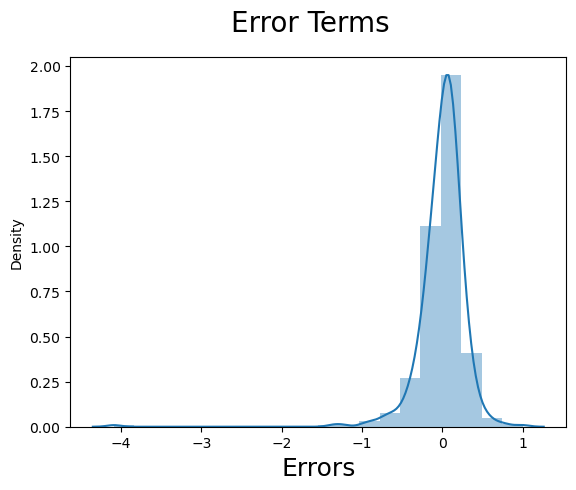

In [170]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### ___Step 5 : Making Predictions___

#### ___Step 5.1 : Scaling and transforming the Numerical Values in Test DataFrame___

In [174]:
num_columns

['cnt', 'temp_hum', 'temp_wind', 'hum_wind']

In [183]:
# Transforming the numerical values in the test dataframe.

df_test[['temp_hum','temp_wind','hum_wind']] = scaler.transform(df_test[['temp_hum','temp_wind','hum_wind']])
df_test.head(3)

,season,yr,mnth,weathersit,temp_hum,temp_wind,hum_wind,mnth_2,mnth_3,mnth_4,...,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
184,3,0,7,2,0.778169,0.200004,0.159688,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,2,1,6,1,0.777822,0.321865,0.207131,0,0,0,...,0,0,0,0,0,1,0,0,0,0
299,4,0,10,2,0.641460,0.337531,0.493832,0,0,0,...,0,0,1,0,0,0,0,1,1,0


#### ___Step 5.1 : Spliting data Set into Train Test Split___

In [186]:
y_test.head(3)

184    8.706821
535    8.734238
299    7.886081
Name: cnt, dtype: float64

#### ___Step 5.2 : Let's use our model to make predictions.___

In [189]:
# Adding Constant
X_test_sm = sm.add_constant(X_test)

In [191]:
X_train_rfe_col = X_train_rfe.columns.tolist()

In [193]:
X_train_rfe_col

['const',
 'season',
 'yr',
 'temp_hum',
 'temp_wind',
 'hum_wind',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'weathersit_2',
 'weathersit_3']

In [195]:
X_test_sm = X_test_sm[X_train_rfe_col]

In [197]:
y_test_pred = lr.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

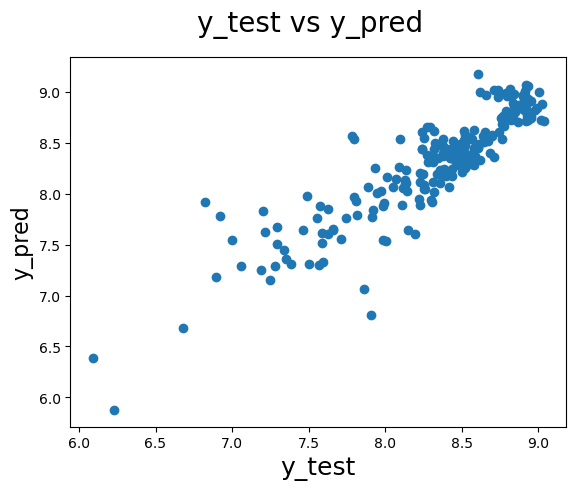

In [199]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [201]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.784928831783892